In [312]:
import numpy as np
import random as rd
import cv2
import matplotlib.pyplot as plt

In [313]:
# test với ảnh thật kênh màu BGR
img = cv2.imread('image/room.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(500, 800, 3)

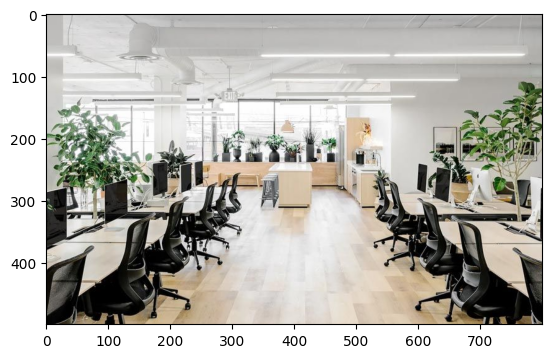

In [314]:
plt.imshow(img)
plt.show()

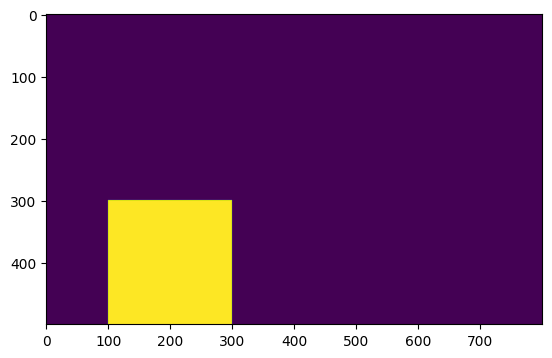

In [315]:
# khởi tạo ma trận mask không màu và có kích thước bằng ảnh gốc 500x800
mask = np.zeros_like(img)
# khởi tạo 1 matrix có kích thước bằng mask tuy nhiên có 1 vùng 50x50 có giá trị 1
mask_1 = np.zeros((500, 800))
mask_1[300:500, 100:300] = 1
plt.imshow(mask_1)
plt.show()

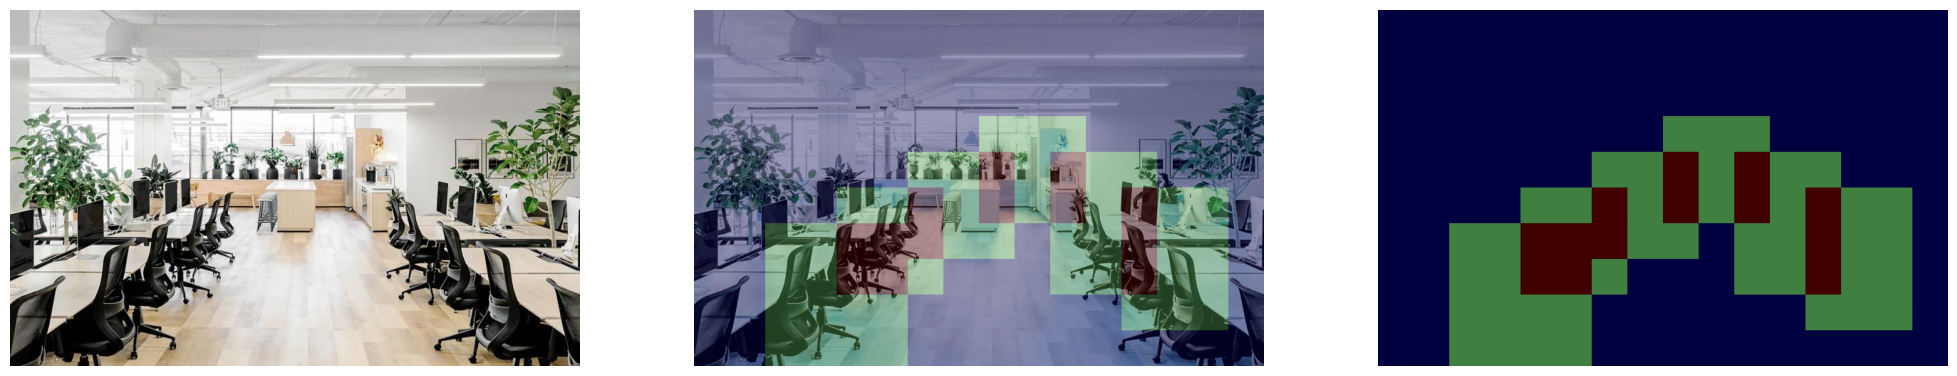

In [316]:
img = cv2.imread('image/room.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask_1 = np.zeros((500, 800))
mask_1[300:500, 100:300] = 1
mask_2 = np.zeros((500, 800))
mask_2[250:400, 200:350] = 1
mask_3 = np.zeros((500, 800))
mask_3[200:350, 300:450] = 1
mask_4 = np.zeros((500, 800))
mask_4[150:300, 400:550] = 1
mask_5 = np.zeros((500, 800))
mask_5[200:400, 500:650] = 1
mask_6 = np.zeros((500, 800))
mask_6[250:450, 600:750] = 1

img_mask = np.zeros_like(img)

accumulated_mask = mask_1 + mask_2 + mask_3 + mask_4 + mask_5 + mask_6

normalized_mask = np.clip(accumulated_mask / accumulated_mask.max(), 0, 1)

colored_mask = cv2.applyColorMap(np.uint8(255 * normalized_mask), cv2.COLORMAP_JET)

result_img = cv2.addWeighted(img_mask, 0.6, colored_mask, 0.5, 0)

# result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
# add mask to image
image_output = cv2.addWeighted(img, 0.6, result_img, 0.5, 0)

image_output = cv2.cvtColor(image_output, cv2.COLOR_BGR2RGB)
result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(25, 25))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_output)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_img)
plt.axis('off')
plt.show()


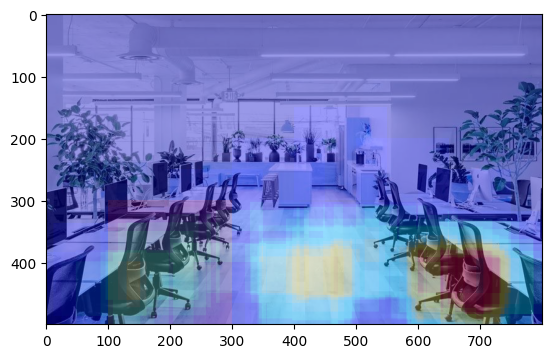

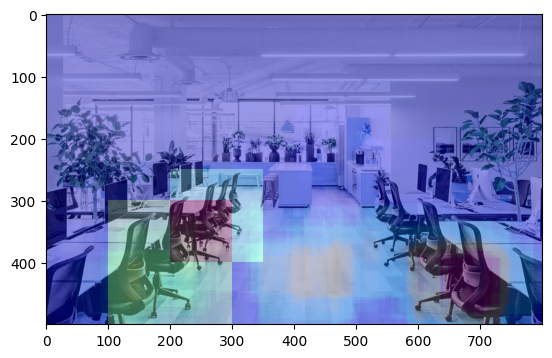

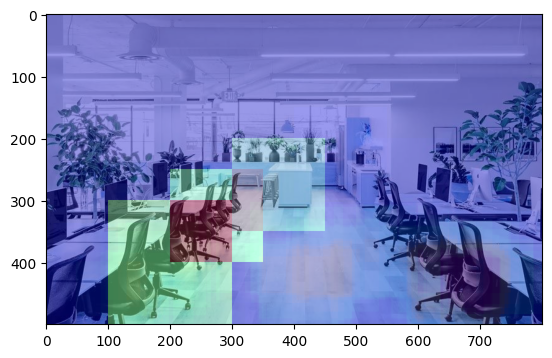

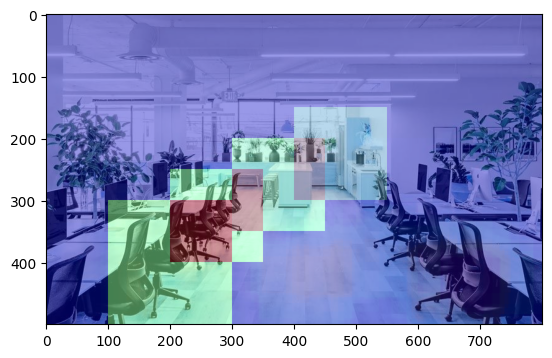

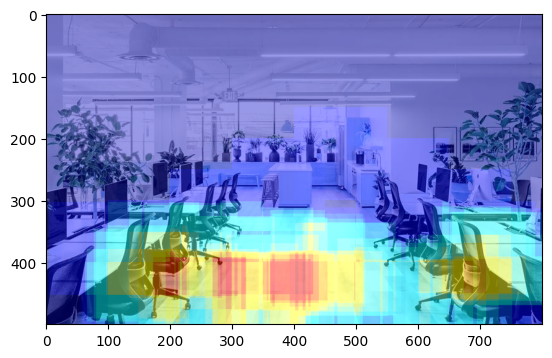

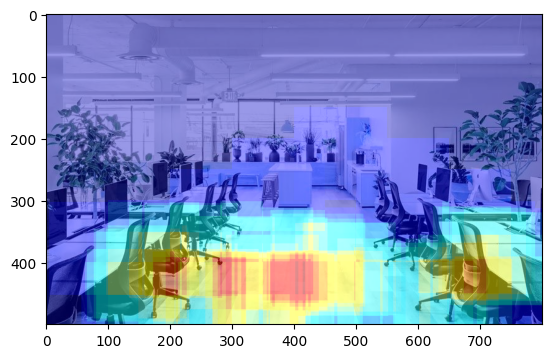

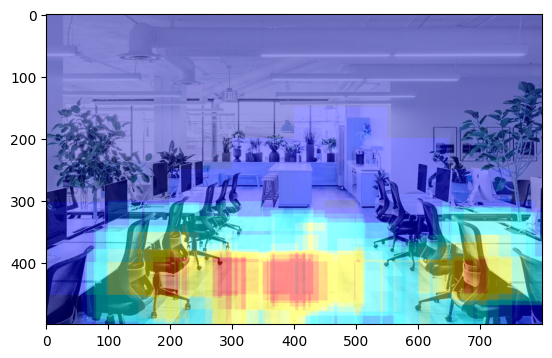

In [318]:
img = cv2.imread('image/room.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask_1 = np.zeros((500, 800))
mask_1[300:500, 100:300] = 1
mask_2 = np.zeros((500, 800))
mask_2[250:400, 200:350] = 1
mask_3 = np.zeros((500, 800))
mask_3[200:350, 300:450] = 1
mask_4 = np.zeros((500, 800))
mask_4[150:300, 400:550] = 1
mask_5 = np.zeros((500, 800))
mask_5[200:400, 500:650] = 1
mask_6 = np.zeros((500, 800))
mask_6[250:450, 600:750] = 1

additional_masks = []

for _ in range(50):
    x = rd.randint(0, 700)
    y = rd.randint(300, 400)
    mask = np.zeros((500, 800))
    mask[y:y+150, x:x+150] = 1
    additional_masks.append(mask)

masks = [mask_1, mask_2, mask_3, mask_4, mask_5, mask_6]
masks.extend(additional_masks)

def update_mask(mask, accumulative_heat_map):
    accumulative_heat_map += mask
    heat_map = np.clip(accumulative_heat_map / accumulative_heat_map.max(), 0, 1)
    colored_mask = cv2.applyColorMap(np.uint8(255 * heat_map), cv2.COLORMAP_JET)
    result_mask = cv2.addWeighted(img_mask, 0.6, colored_mask, 0.5, 0)
    return result_mask, accumulative_heat_map

def plot_img(img, mask):
    img = cv2.addWeighted(img, 0.6, mask, 0.5, 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
# khởi tạo accumulative_heat_map = 0, heat_map = 0
accumulative_heat_map = np.zeros((500, 800))
heat_map = np.zeros((500, 800))

# update và plot ra 3 ảnh đầu và 3 ảnh cuối
for i in range(len(masks)):
    mask = masks[i]
    img_mask, accumulative_heat_map = update_mask(mask, accumulative_heat_map)
    if i <= 3:
        plot_img(img, img_mask)
    if i >= (len(masks) - 3):
        plot_img(img, img_mask)
    


In [323]:
from ultralytics import YOLO
import cv2

yolo = YOLO("yolov8n.pt")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    results = yolo(frame)
    for result in results:
        frame = result.plot()
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()

cv2.destroyAllWindows()


0: 480x640 2 persons, 1 chair, 71.5ms
Speed: 1.0ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 96.3ms
Speed: 1.0ms preprocess, 96.3ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 76.3ms
Speed: 1.0ms preprocess, 76.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 73.0ms
Speed: 1.0ms preprocess, 73.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 70.9ms
Speed: 1.0ms preprocess, 70.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 75.5ms
Speed: 2.0ms preprocess, 75.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 chairs, 74.0ms
Speed: 0.0ms preprocess, 74.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 74.8ms
Speed: 1.0ms pr